Fiona Fan, credit @ Cooper Nederhood & Zeshun Zong

### Differentiation 
p1.

In [3]:
import sympy as sy 
import numpy as np 
import matplotlib.pyplot as plt
import autograd.numpy as anp 
import timeit 
from autograd import grad 
from autograd import elementwise_grad


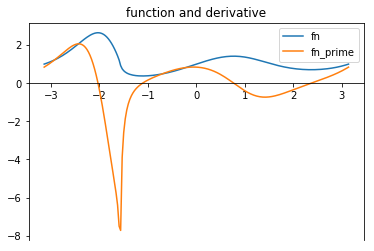

In [4]:
def sym_diff():
    x = sy.symbols('x')
    g = sy.diff( (sy.sin(x) + 1)**(sy.sin(sy.cos(x))), x)
    return sy.lambdify(x, g)

x_vals = np.linspace(-np.pi, np.pi, 200)
f = lambda x: (np.sin(x) + 1)**(np.sin(np.cos(x)))
f_prime = sym_diff()

plt.plot(x_vals, f(x_vals), label = 'fn')
plt.plot(x_vals, f_prime(x_vals), label = 'fn_prime')
plt.title('function and derivative')
plt.legend()
ax = plt.gca()
ax.spines["bottom"].set_position("zero")


P2

In [5]:
def forward_1(fn, x_vals, h):
	return (fn(x_vals+h) -fn(x_vals))/h

def forward_2(fn, x_vals, h):
	return (-3*fn(x_vals) + 4*fn(x_vals+h)-fn(x_vals+2*h))/(2*h)

def backward_1(fn, x_vals, h):
	return (fn(x_vals) - fn(x_vals-h))/h 

def backward_2(fn, x_vals, h):
	return (3*fn(x_vals) - 4*fn(x_vals+h)+fn(x_vals+2*h))/(2*h)

def centered_1(fn, x_vals, h):
	return (fn(x_vals+h) - fn(x_vals-h))/(2*h)

def centered_2(fn, x_vals, h):
	return (fn(x_vals-2*h) - 8*fn(x_vals-h) + 8*fn(x_vals+h) - fn(x_vals+2*h))/(12*h)



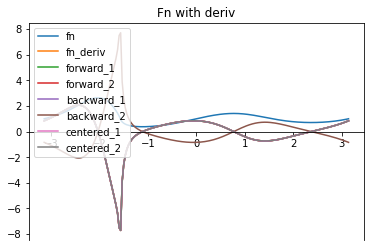

In [6]:
plt.plot(x_vals, f(x_vals), label = 'fn')
plt.plot(x_vals, f_prime(x_vals), label = 'fn_deriv')
plt.title('Fn with deriv')
ax = plt.gca()
ax.spines["bottom"].set_position("zero")

plt.plot(x_vals, forward_1(f, x_vals, 0.00000001), label='forward_1')
plt.plot(x_vals, forward_2(f, x_vals, 0.00000001), label='forward_2')
plt.plot(x_vals, backward_1(f, x_vals, 0.00000001), label='backward_1')
plt.plot(x_vals, backward_2(f, x_vals, 0.00000001), label='backward_2')
plt.plot(x_vals, centered_1(f, x_vals, 0.00000001), label='centered_1')
plt.plot(x_vals, centered_2(f, x_vals, 0.00000001), label='centered_2')
plt.legend()
# plt.savefig('Differentiation_q2.png')

p3

In [7]:
def build(diff_fn, fn, x_vals, h):

	return diff_fn(fn,x_vals, h)	

def plot_convergence(pt):

	f = lambda x: (np.sin(x) + 1)**(np.sin(np.cos(x)))

	h_vals = np.logspace(-3, 0, 10)
	y_vals = np.empty((10,6))

	labels = ['1 forward', '2 forward', '1 backward', '2 backward', '1 centered', '2 centered']

	for i in range(10):
		t = build(forward_1, f, pt, h_vals[i] )
		print(t)
		y_vals[i][0] = build(forward_1, f, pt, h_vals[i] )
		y_vals[i][1] = build(forward_2, f, pt, h_vals[i] )
		y_vals[i][2] = build(backward_1, f, pt, h_vals[i] )
		y_vals[i][3] = build(backward_2, f, pt, h_vals[i] )
		y_vals[i][4] = build(centered_1, f, pt, h_vals[i] )
		y_vals[i][5] = build(centered_2, f, pt, h_vals[i] )

	for i in range(6):
		l = "Order " + labels[i]
		plt.loglog(h_vals, y_vals[:,i], label=l, marker="o")


	plt.legend()
	plt.ylabel("Absolute error")
	plt.xlabel("h")
	plt.title("Convergence through time")

-0.39730944594618123
-0.3981962041663766
-0.40010275325135397
-0.4041919581382558
-0.41291516392415734
-0.43129026095727335
-0.4687854044850792
-0.5385793549118977
-0.6310291300496006
-0.5990423877250033


C:\Users\jfan3\Anaconda3\lib\site-packages\matplotlib\ticker.py:2206: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  "Data has no positive values, and therefore cannot be "


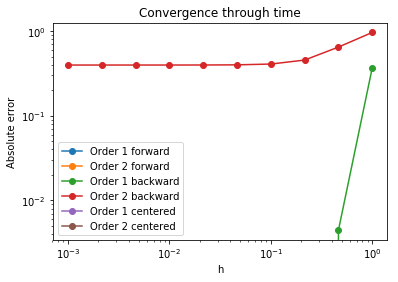

In [8]:
plot_convergence(1)


P4

In [9]:
d = np.load('plane.npy')

ALPHA = 1
BETA = 2
d_rad = np.copy(d)
d_rad[:,ALPHA] = np.deg2rad(d[:,ALPHA])
d_rad[:,BETA] = np.deg2rad(d[:,BETA])
x_t = 500 * np.tan(d_rad[:,BETA]) / (np.tan(d_rad[:,BETA]) - np.tan(d_rad[:,ALPHA]))
y_t = 500 * np.tan(d_rad[:,BETA])*np.tan(d_rad[:,ALPHA]) / (np.tan(d_rad[:,BETA]) - np.tan(d_rad[:,ALPHA]))

x_t_p1 = np.append(x_t[1:], [0])
x_t_m1 = np.append([0], x_t[:-1])
y_t_p1 = np.append(y_t[1:], [0])
y_t_m1 = np.append([0], y_t[:-1])

x_prime = np.empty((d.shape[0]))
x_prime[1:-1] = (1/2)*(x_t_p1[1:-1] - x_t_m1[1:-1])
x_prime[0] = (1/2)*(x_t_p1[0] - x_t[0])
x_prime[-1] = (1/2)*(-x_t_m1[-1] + x_t[-1])

y_prime = np.empty((d.shape[0]))
y_prime[1:-1] = (1/2)*(y_t_p1[1:-1] - y_t_m1[1:-1])
y_prime[0] = (1/2)*(y_t_p1[0] - y_t[0])
y_prime[-1] = (1/2)*(-y_t_m1[-1] + y_t[-1])

speed = np.sqrt(y_prime**2 + x_prime**2)
print("Speed vector is:\n", speed)


Speed vector is:
 [23.21210031 47.00103938 48.99880514 50.09944163 48.29035084 51.56455905
 53.92303355 25.75740028]


p5

In [23]:
def numerical_jacobian(f, pt, h):
	m = len(f)
	n = pt.shape[0]
	I = np.identity(n)
	J = np.empty((m, n))
	for i in range(m):
		fn = f[i]
		for j in range(n):
			J[i,j] = (fn(pt + h*I[:,j]) - fn(pt - h*I[:,j])) / (2*h)

	return J 



In [34]:
fn1 = lambda vec: vec[0]**2
fn2 = lambda vec: vec[0]**3 - vec[1] 
fn = [fn1, fn2]
pt = np.array([1,2])
fn_J = numerical_jacobian(fn, pt, .00000001)
print(fn_J)

[[ 1.99999999  0.        ]
 [ 2.99999999 -0.99999999]]


ps6

In [35]:
def cheb_poly(x_array, n):

	if n == 0:
		return anp.ones_like(x_array)

	if n == 1:
		return x_array 

	else:
		return 2*x_array*cheb_poly(x_array, n-1) - cheb_poly(x_array, n-2)




C:\Users\jfan3\Anaconda3\lib\site-packages\autograd\tracer.py:14: UserWarning: Output seems independent of input.
  warnings.warn("Output seems independent of input.")


Text(0.5,1,'Chebychev')

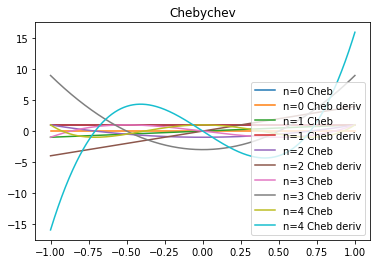

In [37]:
cheb_poly_deriv = elementwise_grad(cheb_poly)
x_vals = anp.linspace(-1, 1, 1000)
for n in range(5):
	plt.plot(x_vals, cheb_poly(x_vals, n), label="n={} Cheb".format(n))
	plt.plot(x_vals, cheb_poly_deriv(x_vals, n), label="n={} Cheb deriv".format(n))

plt.legend()
plt.title("Chebychev")

P7

Text(0,0.5,'Absolute error')

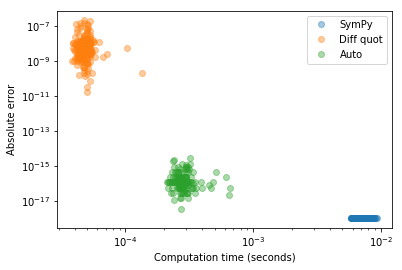

In [39]:
def experiment(N):

	f = lambda x: (anp.sin(x) + 1)**(anp.sin(anp.cos(x)))
	x_vals = np.random.uniform(0, 2*np.pi, N)

	data_2 = np.empty((N,2))
	data_3 = np.empty((N,2))
	data_4 = np.empty((N,2))

	for i in range(N):
		x_0 = x_vals[i]

		# (2):
		start = timeit.default_timer()
		f_prime = sym_diff()
		f_prime_2 = f_prime(x_0)
		error_2 = 1e-18
		time_2 = timeit.default_timer() - start
		data_2[i,0] = error_2
		data_2[i,1] = time_2

		# (3):
		start = timeit.default_timer()
		f_prime_3 = centered_2(f, x_0, 0.00000001)
		error_3 = np.abs(f_prime_2 - f_prime_3)
		time_3 = timeit.default_timer() - start
		data_3[i,0] = error_3
		data_3[i,1] = time_3

		# (4):
		start = timeit.default_timer()
		f_grad = grad(f)
		f_prime_4 = f_grad(x_0)
		error_4 = np.abs(f_prime_4 - f_prime_2)
		time_4 = timeit.default_timer() - start
		data_4[i,0] = error_4
		data_4[i,1] = time_4

	return data_2, data_3, data_4 

data_2, data_3, data_4  = experiment(200)
plt.loglog(data_2[:,1], data_2[:,0], linestyle="None", alpha=0.4, label='SymPy', marker='o' )
plt.loglog(data_3[:,1], data_3[:,0], linestyle="None", alpha=0.4, label='Diff quot', marker='o' )
plt.loglog(data_4[:,1], data_4[:,0], linestyle="None", alpha=0.4, label='Auto', marker='o' )
plt.legend()
plt.xlabel('Computation time (seconds)')
plt.ylabel('Absolute error')


### Iter
p1&2

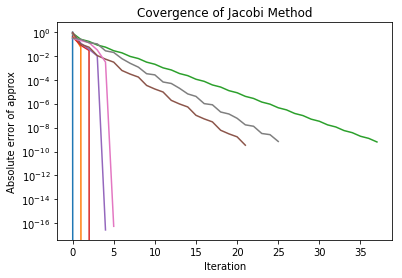

In [41]:

def jacobi(A, b, tol, maxiters, plot=False):


	iter_count = 0
	error = np.inf 

	D = np.diag(A)	
	L = np.tril(A, k=-1)
	U = np.triu(A, k=1)

	error_tracker = np.empty(maxiters)

	assert np.allclose(A, np.diag(D) + L + U)

	D_inv = 1/D 
	D_inv = D_inv.reshape((D_inv.size, 1))

	cur_x = np.zeros((A.shape[1],1))

	while (iter_count < maxiters) and (error > tol):

		new_x = cur_x + D_inv*(b-A@cur_x)

		error = np.max(np.abs(new_x - cur_x))
		error_tracker[iter_count] = error 
		iter_count += 1


		cur_x = new_x 

	error_tracker = error_tracker[0:iter_count]
	if plot:
		plt.semilogy(range(iter_count), error_tracker)
		plt.xlabel("Iteration")
		plt.ylabel("Absolute error of approx")
        
		plt.title("Covergence of Jacobi Method")

	return cur_x 


def diag_dom(n, num_entries=None):
	"""Generate a strictly diagonally dominant (n, n) matrix.
	Parameters:
	n (int): The dimension of the system.
	num_entries (int): The number of nonzero values.
	Defaults to n^(3/2)-n.
	Returns:
	A ((n,n) ndarray): A (n, n) strictly diagonally dominant matrix.
	"""
	if num_entries is None:
		num_entries = int(n**1.5) - n
	A = np.zeros((n,n))
	rows = np.random.choice(np.arange(0,n), size=num_entries)
	cols = np.random.choice(np.arange(0,n), size=num_entries)
	data = np.random.randint(-4, 4, size=num_entries)
	for i in range(num_entries):
		A[rows[i], cols[i]] = data[i]
	for i in range(n):
		A[i,i] = np.sum(np.abs(A[i])) + 1
	return A

def test_part1(n):

	A = diag_dom(n)
	b = np.random.random(n).reshape((n,1))
	x = jacobi(A, b, 10e-10, 200, plot=True)

	return np.allclose(A@x, b)

for n in range(2, 10):
	assert test_part1(n)


p3

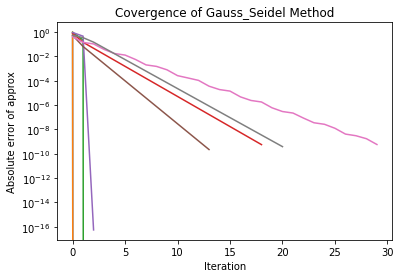

In [42]:
def Gauss_Seidel(A, b, tol, maxiters, plot=False):

	n = A.shape[1]
	iter_count = 0
	error = np.inf 

	error_tracker = np.empty(maxiters)

	cur_x = np.zeros((n,1))

	while (iter_count < maxiters) and (error > tol):

		preserve_x = np.copy(cur_x)
		for i in range(n):
			cur_x[i,0] += (1/A[i,i]) * (b[i,0] - A[i,:].T @ cur_x)

		error = np.max(np.abs(preserve_x - cur_x))
		error_tracker[iter_count] = error 
		iter_count += 1


	error_tracker = error_tracker[0:iter_count]
	if plot:
		plt.semilogy(range(iter_count), error_tracker)
		plt.xlabel("Iteration")
		plt.ylabel("Absolute error of approx")
		plt.title("Covergence of Gauss_Seidel Method")
		plt.savefig('Gauss_Seidel_covergence.png')


	return cur_x 

def test_part3(n):

	A = diag_dom(n)
	b = np.random.random(n).reshape((n,1))
	x = Gauss_Seidel(A, b, 10e-10, 200, plot=True)

	return np.allclose(A@x, b)

for n in range(2, 10):
	assert test_part3(n)
# 	assert True
# print("Passed test #3")

p4

In [44]:
import scipy.sparse as sparse

def Gauss_Seidel_sparse(A, b, tol, maxiters):
	'''
	NOTE: matrix A is a sparse matrix
	'''

	n = A.shape[1]
	iter_count = 0
	error = np.inf 

	cur_x = np.zeros((n,1))

	while (iter_count < maxiters) and (error > tol):

		preserve_x = np.copy(cur_x)
		for i in range(n):
			rowstart = A.indptr[i]
			rowend = A.indptr[i+1]

			Aix = A.data[rowstart:rowend] @ cur_x[A.indices[rowstart:rowend]]
			cur_x[i,0] += (1/A[i,i]) * (b[i,0] - Aix)

		error = np.max(np.abs(preserve_x - cur_x))
		iter_count += 1

	return cur_x 

def test_part4(n):

	A = diag_dom(n)
	b = np.random.random(n).reshape((n,1))
	x = Gauss_Seidel_sparse(sparse.csr_matrix(A), b, 10e-10, 200)

	return np.allclose(A@x, b)

for n in range(2, 10):
	assert test_part4(n)


p5

In [45]:
def Gauss_Seidel_SOR(A, b, tol, maxiters, omega):
	'''
	NOTE: matrix A is a sparse matrix
	'''

	n = A.shape[1]
	iter_count = 0
	error = np.inf 

	cur_x = np.zeros((n,1))

	while (iter_count < maxiters) and (error > tol):

		preserve_x = np.copy(cur_x)
		for i in range(n):
			rowstart = A.indptr[i]
			rowend = A.indptr[i+1]

			Aix = A.data[rowstart:rowend] @ cur_x[A.indices[rowstart:rowend]]
			cur_x[i,0] += (omega/A[i,i]) * (b[i,0] - Aix)

		error = np.max(np.abs(preserve_x - cur_x))
		iter_count += 1

	return cur_x, iter_count

def test_part5(n):

	A = diag_dom(n)
	b = np.random.random(n).reshape((n,1))
	x = Gauss_Seidel_SOR(sparse.csr_matrix(A), b, 10e-10, 200, .5)[0]

	return np.allclose(A@x, b)

for n in range(2, 10):
	assert test_part5(n)

P6

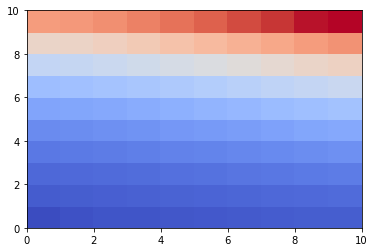

In [46]:
def laplace(n, omega, tol=10e-8, maxiters=100, plot=False):

	b_n = np.zeros(n)
	b_n[0] = -100
	b_n[n-1] = -100
	b = np.tile(b_n, n)
	b = b.reshape((n**2,1))

	A = np.tile(np.identity(n), (n,n) )
	np.fill_diagonal(A, -4)

	ones = np.ones( (n**2, n**2) )
	ones_diag_upper = np.triu(np.tril(ones, 1), 1)
	ones_diag_lower = np.triu(np.tril(ones, -1), -1)

	A = A + ones_diag_lower + ones_diag_upper

	x, iters = Gauss_Seidel_SOR(sparse.csr_matrix(A), b, tol, maxiters, omega)

	x = x.reshape((n,n))

	if plot:
		plt.pcolormesh(x, cmap="coolwarm")

laplace(10, 1, plot=True)

### Simplex


In [93]:

class Simplex:
    def __init__(self, c, A, b):
        if (np.less_equal(np.zeros(len(b)), b).all):
            self.c = c
            self.A = A
            self.b = b
            #print("tres")
            
        else:
            raise ValueError("Origin is not feasible")
            
    
    def index(self):
        A = self.A
        m, n = A.shape
        a = np.arange(n, n + m)
        b = np.arange(0, n)
        L = np.hstack([a, b])
        L = np.ndarray.tolist(L)
        return L
    def get_tableau(self):
        A = self.A
        b = self.b
        c = self.c
        m, n = A.shape
        c_bar = np.concatenate([c, np.zeros(m)])
        c_bar = -1 * c_bar
        T1 = np.concatenate([np.array([0]), c_bar, np.array([1])])
        A_bar = np.concatenate([A, np.eye(m)], axis = 1)
        T2 = np.hstack([b.reshape(len(b), 1), A_bar, np.zeros((m, 1))])
        T = np.vstack([T1, T2])
        return T
    
    
    def pivot(self, T):
        p, q = T.shape
        T1 = T[0, 1:]
        column = np.where(T1 < 0)[0][0] + 1
        if any(T[:, column] > 0)== False:
            raise ValueError
        else:
            loc = np.where(T[:, column] > 0)[0]
            n = len(loc)
            mat = np.zeros(n) 
            for i in range(n):
                mat[i] = float(T[loc[i], 0]/T[loc[i], column])
            m = np.where(mat==min(mat))[0][0]
            row = loc[m]+1

        return row , column+1 


    def op(self, T, L):
        T1 = np.copy(T)
        m, n = self.pivot(T)
        a, b = m - 2, L.index(n - 2) 
        p, q = T.shape
        m = m - 1
        n = n - 1
        if T[m, n] != 0:
             T1[m,:] = T[m, :]/float(T[m, n])
        for i in range(p):
            if i == m or T[i, n] == 0:
                T1[i, :] = T1[i, :]
            else:
                T1[i, :] = T1[i, :] - float((T1[i, n]/T1[m, n])) * T1[m, :]

        else:
             T1[m,:] = T[m, :]

        L[a], L[b] = L[b], L[a]
        return T1, L

    def solve(self, T, L):
        tol = -1e-8
        while any(T[0, 1:] < tol) == True:
            T_new, L_new = self.op(T, L)
            T = np.copy(T_new)
            L = L_new
        value = np.ndarray.tolist(T[1:,0])
        n = len(value)
        D1 = dict(zip(L[:n], [float(str(round(i, 2))) for i in value]))
        D2 = dict(zip((L[n:]), np.zeros(len(L) - n)))
        return float(T[0,0]), D1, D2

In [95]:
prob = np.load('productMix.npz')
A = prob['A']
p = prob['p']
m = prob['m']
d = prob['d']

A = np.vstack([A, np.eye(4)])
b = np.hstack([m, d])

s1 = Simplex(p, A, b)
L = s1.index()
T = s1.get_tableau()
s1.solve(T, L)


(7453.596491228071,
 {0: 10.0, 1: 1.11, 2: 12.0, 3: 0.11, 6: 0.97, 8: 13.81, 10: 8.21},
 {4: 0.0, 5: 0.0, 7: 0.0, 9: 0.0})

### Newton
p1

In [59]:
def newton(f,f_p, tol,maxiter=15,ini=0):
    x0 = ini
    it=1
    diff=12
    while (diff>tol) & (it<=maxiter):
        x1= x0-f(x0)/f_p(x0)
        diff=abs(x1-x0)
        x0=x1
        it=it+1
    if it==maxiter:
        print('does not converge')
    return x0
f=lambda x:x**2-x-1
f_p=lambda x: 2*x-1
x=newton(f,f_p,1e-5)
f(x)


2.1094237467877974e-13

p2

In [63]:
def fr(r, args):
    p1, p2, n1, n2 = args
    return p1*((1+r)**n1-1) - p2*(1-(1+r)**(-n2))

def fr_prime(r, args):
    p1, p2, n1, n2 = args
    return p1*n1*(1+r)**(n1-1)-p2*n2*(1+r)**(-n2-1)

arguments = (2000, 8000, 30, 20)

gr = lambda r : fr(r, arguments)
gr_prime = lambda r:fr_prime(r, arguments)

res2 = newton(gr,  gr_prime,1e-10,ini=0.1)
print(res2)

0.03877843202967382


P3

In [80]:
def newton_new(f,f_p, tol,maxiter=15,ini=0,alpha=1):
    x0 = ini
    it=1
    diff=12
    while (diff>tol) & (it<maxiter):
        x1= x0-f(x0)/f_p(x0)*alpha
        diff=abs(x1-x0)
        x0=x1
        it=it+1

    if it==maxiter:
        print('does not converge')
    return x0, it
f = lambda x : np.sign(x) * np.power(np.abs(x), 1.0/3)
f_p = lambda x : 1/( np.power(np.abs(x), 2.0/3))/3                           
x=newton_new(f,f_p,1e-5,ini=0.01,maxiter=500)
                                          
x2=newton_new(f,f_p,1e-5,ini=0.01,maxiter=500,alpha=0.4)
x2

does not converge


(6.400000000000125e-07, 7)

does not converge
does not converge
does not converge
does not converge
does not converge
does not converge
does not converge
does not converge
does not converge
does not converge
does not converge
does not converge
does not converge
does not converge
does not converge
does not converge
does not converge
does not converge
does not converge
does not converge
does not converge
does not converge
does not converge
does not converge
does not converge
does not converge
does not converge
does not converge
does not converge
does not converge
does not converge
does not converge
does not converge
does not converge


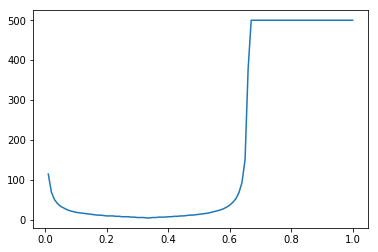

In [83]:
alphas=np.linspace(0.01,1,100)
# print(alphas)
iters=[]
for a in alphas:
    x,it = newton_new(f,f_p,1e-5,ini=0.01,maxiter=500,alpha=a)
    iters.append(it)
plt.plot(alphas,iters)


In [86]:
from autograd import elementwise_grad
from autograd import jacobian
from sympy.matrices import *
from autograd import grad
import autograd.numpy as anp
import sympy as sy
from sympy import lambdify
from sympy import *
import numpy.linalg as la

def nd_newton(f, Df, x0, tol = 1e-6, maxiter = 100, alpha = 1):
    difference = tol + 1
    currentItr = 1
    if np.isscalar(x0):
        x1=0 #initialize
        while (currentItr < maxiter) and (difference > tol):
            x1 = x0 - f(x0)/Df(x0)*alpha
            difference = abs(x1 - x0)
            x0 = x1
            currentItr += 1
        if (currentItr == maxiter):
            raise ValueError("Does not converge")
        return x0
    else:
        n = x0.shape
        while (currentItr < maxiter) and (difference > tol):
            x1 = x0 - alpha * la.inv(Df(x0)) @ f(x0)
            difference = la.norm(x1 - x0)
            x0 = x1
            currentItr += 1
        if (currentItr == maxiter):
            raise ValueError("Does not converge")
        return x0
    
def Df(x_vec):
    x, y = sy.symbols("x y")
    func1_sy = exp(x)*sin(y) + y**3
    func2_sy = 3*y - cos(x)
    func_sy = Matrix([func1_sy, func2_sy])
    jac_sy = func_sy.jacobian([x,y])
    jac_func = lambdify((x,y), jac_sy)
    return jac_func(x_vec[0], x_vec[1])

def f(x_vec):
    x, y = x_vec
    return np.array([np.exp(x)*np.sin(y)+y**3, 3*y-np.cos(x)])

ans = nd_newton(f, Df, np.array([1,1]))
f(ans)

array([-1.14941565e-19, -6.13040220e-17])

P6

In [87]:
def fun(x_vec):
    x, y = x_vec
    gamma = 5
    delta = 1
    a1 = gamma * x * y - x * (1+y)
    a2 = -x*y + (delta - y)*(1+y)
    return np.array([a1, a2])

def Dfun(x_vec):
    x, y = sy.symbols("x y")
    gamma = 5
    delta = 1
    func1_sy = gamma * x * y - x * (1+y)
    func2_sy = -x*y + (delta - y)*(1+y)
    func_sy = Matrix([func1_sy, func2_sy])
    jac_sy = func_sy.jacobian([x,y])
    jac_func = lambdify((x,y), jac_sy)
    
    return jac_func(x_vec[0], x_vec[1])
 


print(nd_newton(fun, Dfun, np.array([-0.15, 0.15]), alpha = 1))
print("This is sufficiently close to 0, -1")

[-7.16963966e-21 -1.00000000e+00]
This is sufficiently close to 0, -1


P7

C:\Users\jfan3\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in true_divide
  """
C:\Users\jfan3\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """


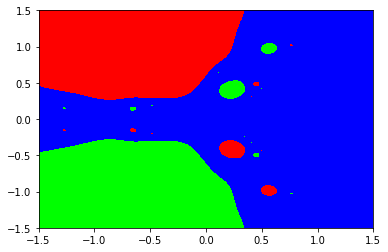

In [91]:
import math
def newton_iters(f, f_prime, x0, iters):
    currentItr = 1
    while currentItr <= iters:
        x1 = x0 - f(x0)/f_prime(x0)
        x0 = x1
        currentItr += 1
    return x1

def basins(f, f_prime, zeros, bounds, res, iters):
    r_min, r_max, i_min, i_max = bounds
    x_real = np.linspace(r_min, r_max, res)
    x_imag = np.linspace(i_min, i_max, res)
    X_real, X_imag = np.meshgrid(x_real, x_imag)
    X0 = X_real + 1j*X_imag
    Xk = np.zeros_like(X0)
    Xk = newton_iters(f, f_prime, X0, iters)
    
    Y = get_Y(Xk, zeros)
    
    plt.pcolormesh(x_real, x_imag, Y, cmap = "brg")
    #return Xk
    

def get_Y(Xk, zeros):
    m, n = Xk.shape
    Y = np.zeros((m,n))
    for z in range(len(zeros)):
        for i in range(m):
            for j in range(n):
                if np.allclose(Xk[i,j], zeros[z]):
                    Y[i,j] = int(z)
    return Y
bounds = [-1.5,1.5,-1.5,1.5]
f = lambda x:x**3 -1
f_prime = lambda x : 3 * x**2

zeros = np.array([1, -0.5+1j*math.sqrt(3)/2, -0.5-1j*math.sqrt(3)/2])




basins(f, f_prime, zeros, bounds, 901, 6)




### Integration
p1

In [97]:
def newton_cotes(g, a, b, N, method = "midpoint"):
    '''
    g: a function of x
    a, b: lower and upper bound of integration
    N: number of intervals cutted
    method: \in {"midpoint", "trapezoid", "Simpsons"}
    '''
    
    if method == "midpoint":
        # Since there are N intervals, there should be N midpoints
        midpoints = np.zeros(N)
        temp = 0
        for i in range(N):
            midpoints[i] = a + (2*i+1)*(b-a)/(2*N)
            temp += g(midpoints[i])    
        result = (b-a)/N * temp
    elif method == "trapezoid":
        # N intervals would yield N+1 points
        endpoints = np.zeros(N+1)
        for i in range(N+1):
            endpoints[i] = a + (b-a)*i/N
        temp = 0
        for i in range(1, N):
            temp += g(endpoints[i])
        result = (b-a)/(2*N)*(g(a) + 2 * temp + g(b))
    elif method == "Simpsons":
        #For N intervals there are N+1 endpoints and N sample points
        samplepoints = np.zeros(2*N+1)
        for i in range(2*N+1):
            samplepoints[i] = a + i *(b-a) / (2*N) 
        temp = 0
        for i in range(1, 2*N):
            # loop from i = 1 to 2N-1
            if i%2 == 1:
                # if i is odd
                temp += 4*g(samplepoints[i])
            else:
                # i is even
                temp += 2*g(samplepoints[i])
        result = (b-a)/3/(2*N)*(g(a) + temp + g(b))
        # note that the distance h between two points is (b-a)/(2N)
    else:
        raise ValueError
    return result

In [98]:
g = lambda x : 0.1 * x**4 - 1.5 * x**3 + 0.53 * x**2 + 2*x +1
print("Integrate from -10 to 10, the analytical result is 4373.333")
print("Composite midpoint method, 100 intervals: ",newton_cotes(g, -10, +10, 100))
print("Composite trapezoid method, 100 intervals: ",newton_cotes(g, -10, +10, 100, "trapezoid"))
print("Composite Simpson's method, 100 intervals: ",newton_cotes(g, -10, +10, 100, "Simpsons"))

Integrate from -10 to 10, the analytical result is 4373.333
Composite midpoint method, 100 intervals:  4371.964759999999
Composite trapezoid method, 100 intervals:  4376.07056
Composite Simpson's method, 100 intervals:  4373.333360000001


P2

In [99]:
from scipy.stats import norm
def normal_approximation(mu, sigma, N, k):
    nodes = np.linspace(mu-k*sigma, mu+k*sigma, N)
    weights = np.ones(N)
    # N must be greater than or equal to 2
    weights[0] = norm.cdf((nodes[0]+nodes[1])/2, mu, sigma)
    weights[-1] = 1-norm.cdf((nodes[-1]+nodes[-2])/2, mu, sigma)
    
    pdf = lambda x : 1/ np.sqrt(2*np.pi * sigma**2)*np.exp(-(x-mu)**2/(2*sigma**2))
    for i in range(1, N-1):
        zmin = (nodes[i-1]+nodes[i])/2
        zmax = (nodes[i]+nodes[i+1])/2
        weights[i] = newton_cotes(pdf, zmin, zmax, 400, method = "Simpsons")
        
    return nodes, weights

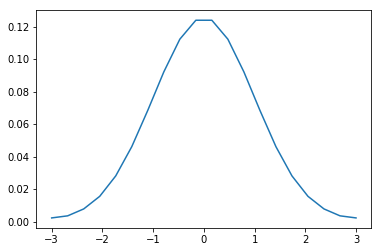

In [100]:
x, y= normal_approximation(0, 1, 20, 3)
plt.plot(x, y)

p3

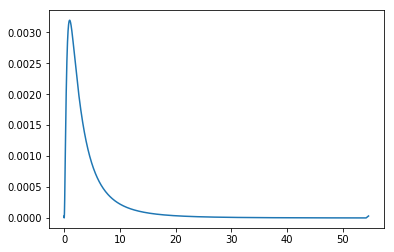

In [101]:
def lognormal_approx(mu, sigma, N, k):
    nodes, weights = normal_approximation(mu, sigma, N, k)
    nodes = np.exp(nodes)
    return nodes, weights

nodes, weights = lognormal_approx(0, 1, 1000, 4)
plt.plot(nodes, weights)

p4

In [102]:

weightsweights, nodes = lognormal_approx(10.5, 0.8, 1000, 6)
print("The estimated expected value is ",(weights * nodes).sum())
print("The true expected value is ", np.exp(10.5 + 0.5 * 0.8 **2))

The estimated expected value is  0.002658168678803726
The true expected value is  50011.087008521754


P5

In [104]:
import scipy.optimize as opt

a = -10
b = 10
#approximate each term 
def equations(x):
    eq1 = x[0] + x[1] + x[2] - (b - a)
    eq2 = x[0] * x[3] + x[1] * x[4] + x[2] * x[5] - ((1/2) * b ** 2 - (1/2) * a ** 2)
    eq3 = x[0] * x[3] ** 2 + x[1] * x[4] ** 2 + x[2] * x[5] ** 2 - ((1/3) * b ** 3 - (1/3) * a ** 3)
    eq4 = x[0] * x[3] ** 3 + x[1] * x[4] ** 3 + x[2] * x[5] ** 3 - ((1/4) * b ** 4 - (1/4) * a ** 4)
    eq5 = x[0] * x[3] ** 4 + x[1] * x[4] ** 4 + x[2] * x[5] ** 4 - ((1/5) * b ** 5 - (1/5) * a ** 5)
    eq6 = x[0] * x[3] ** 5 + x[1] * x[4] ** 5 + x[2] * x[5] ** 5 - ((1/6) * b ** 6 - (1/6) * a ** 6)
    return np.array([eq1, eq2, eq3, eq4, eq5, eq6])
#opt.root is sensitive to init_guess                        
x = opt.root(equations,(5, 3, 4, -5, 5, 3)).x
weights = x[0:3]
nodes = x[3: 6]
result = 0
for i in range(3): 
    result += (g(nodes[i])) * (weights[i])
print(result)

4373.333333432927


p6

In [106]:

from  scipy.integrate import quad
print(quad(g, -10, 10)[0])

4373.333333333334


P7

In [107]:
from numpy.random import uniform
def monte_carlo_pi(func, draws):
    x_vec = uniform(-1, 1, draws)
    y_vec = uniform(-1, 1, draws)
    #the N coordinates are given by (x_vec[i], y_vec[i])
    
    temp = 0
    for i in range(draws):
        temp += func(np.array([x_vec[i], y_vec[i]]))
    
    return temp * 4 / draws

def pi_func(vec):
    x = vec[0]
    y = vec[1]
    if (x**2 + y**2)<=1:
        return 1
    return 0

monte_carlo_pi(pi_func, 100000)

3.13756

In [108]:
i = 100000
error = np.abs(monte_carlo_pi(pi_func, i) - 3.1415)
while error >= 0.00005:
    i = i + 100
    error = np.abs(monte_carlo_pi(pi_func, i) - 3.1415)
print(i)

106300


P8

In [109]:
def get_n_primes(n):
    # return an nparray of first n prime numbers
    primes = np.array([])
    if n == 0:
        return primes
    # if n >= 1, the first element is 2
    primes = np.append(primes, 2)
    
    x = 3
    while True:
        if len(primes)==n:
            return primes
        
        i=0
        isPrime = True
        while (i < len(primes)) and (primes[i] <= math.sqrt(x)):
            if x%primes[i]==0:
                isPrime = False
                break
            i = i + 1
        if (isPrime):
            primes = np.append(primes, x)
        x = x+1
    return primes

In [110]:
def get_point(n, dimension, method):
    if method == "Weyl":
        primes = get_n_primes(dimension)
        primes = primes ** 0.5 * n - np.floor(primes ** 0.5 * n)
        return primes
    if method == "Haber":
        primes = get_n_primes(dimension)
        temp = n*(n+1)/2*np.sqrt(primes)
        return temp - np.floor(temp)
    if method == "Niederreiter":
      
        
        expo = np.arange(1, dimension+1)
        expo = expo / (dimension+1)
        result = 2**expo * n
        result = result - np.floor(result)
        return result
    
        '''
        ar = np.arange(1, dimension + 1)
        x = n * (2 ** (ar / (dimension + 1)))
        x_floor = np.floor(x)
        seq_elem = x - x_floor
        return seq_elem
        '''
    if method == "Baker":
        primes = get_n_primes(dimension)
        #primes = np.arange(1, dimension+1)
        temp = np.exp(primes)*n
        return temp - np.floor(temp)

In [111]:
get_point(5, 2, "Baker")


array([0.94528049, 0.42768462])

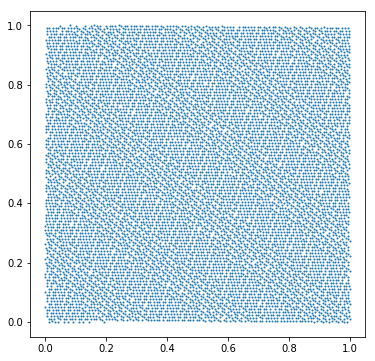

In [112]:
x_coordi = np.zeros(10000)
y_coordi = np.zeros(10000)
for i in range(1,10001):
    x, y = get_point(i, 2, "Niederreiter")
    y_coordi[i-1] = y
    x_coordi[i-1] = x
plt.figure(figsize = (6,6))
plt.plot(x_coordi, y_coordi, "o", markersize = 1)

p9

In [113]:
x_co = np.zeros(100000)
y_co = np.zeros(100000)
for i in range(1,100001):
    x, y = get_point(i, 2, "Baker")
    y_co[i-1] = y
    x_co[i-1] = x
# rescale the coordinates
x_co = x_co * 2 - 1
y_co = y_co * 2 - 1

#use sample points to estimate pi

est = 0
for i in range(100000):
    est += pi_func(np.array([x_co[i], y_co[i]]))
    
est = 4 / 100000 * est
print(est)

3.1418800000000005
